In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from copy import copy
sns.set()

import os

directory = os.fsencode("data")

In [7]:
# make a list of lists with histogram information
peds_hists = []
cars_hists = []

if directory:

    for file in os.listdir(directory):
        filename = os.fsdecode(file)

        if filename.startswith("hist"):
            with open("data/" + filename, 'r') as histogram_file:
                lines = histogram_file.readlines()
                
                for line in lines:
                    if line.startswith("# Next iteration"):
                        peds_hists.append(copy(peds))
                        cars_hists.append(copy(cars))
                        
                    if line.startswith("#"):
                        cars = []
                        peds = []
                    elif line.startswith("Pedestrian"):
                        info = line.split(",")
                        peds.append(int(info[2].strip()))
                    elif line.startswith("Car"):
                        info = line.split(",")
                        cars.append(int(info[2].strip()))

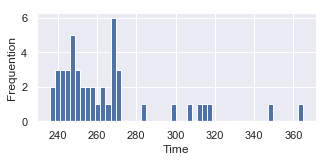

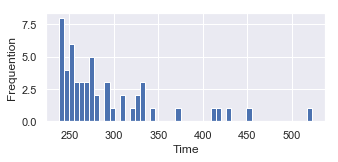

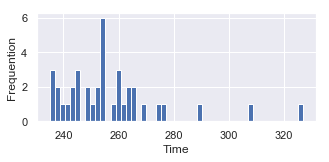

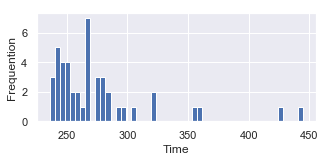

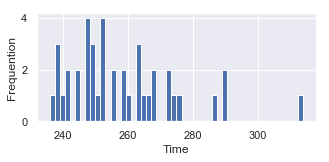

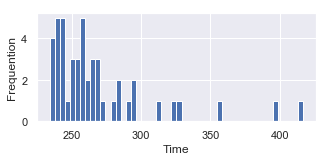

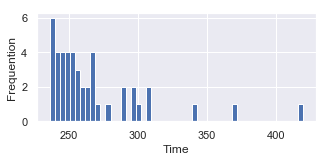

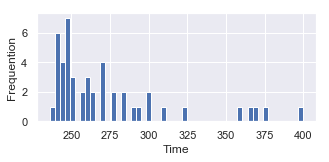

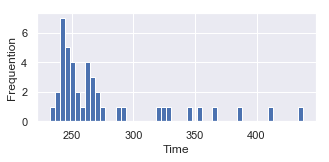

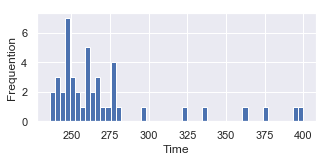

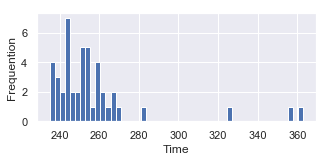

In [8]:
for pedes_times in peds_hists:
    plt.figure(figsize=(5,2))
    plt.xlabel("Time")
    plt.ylabel("Frequention")
    plt.hist(pedes_times, bins = 50)
    plt.show()

In [4]:


if directory:

    for file in os.listdir(directory):
        filename = os.fsdecode(file)

        if filename.startswith("info"):
                        
            df = pd.read_csv("data/" + filename, header=2)
            plt.figure(figsize=(10,10))
            plt.title("Very pretty seaborn graph with the amount of nerds/monkeys/whatever")
            plt.ylabel("Agent count")
            plt.xlabel("Time in simulation")
            
            df_sim = df[df['iteration'] == 0]
            plt.plot(df_sim['time_step'], df_sim['car_count'], label="Amount of cars")
            plt.plot(df_sim['time_step'], df_sim['pedestrian_count'], label="Amount of pedestrians")
            plt.legend()
            plt.show()
            
            


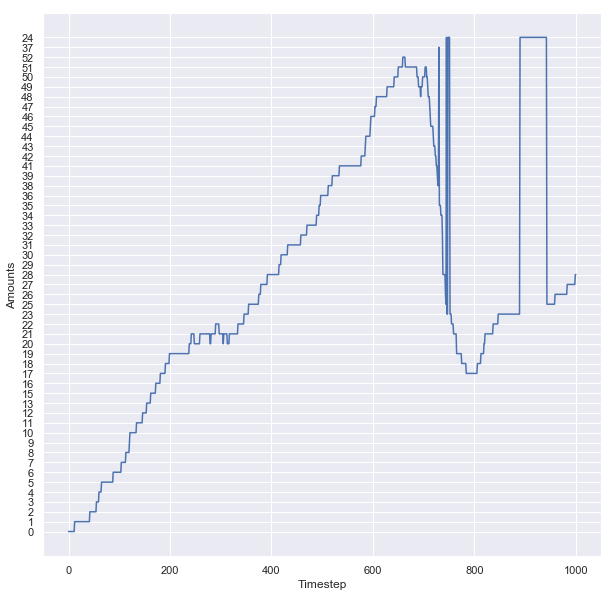

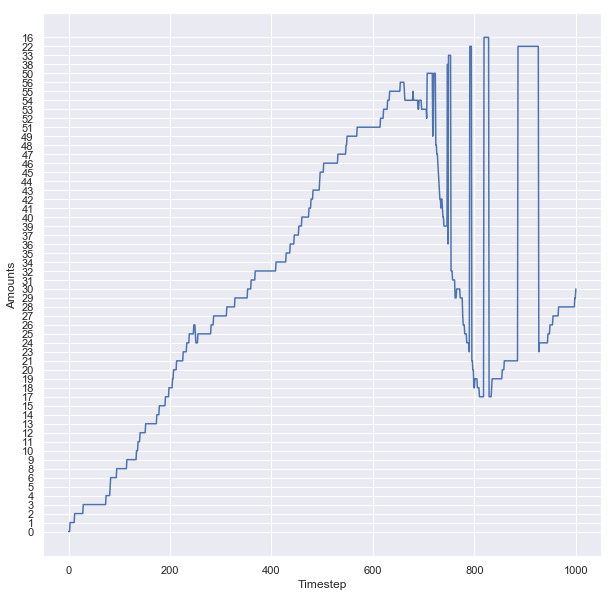

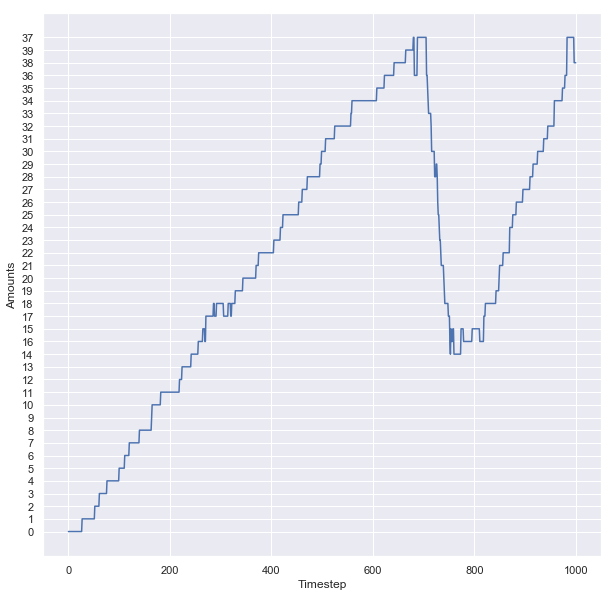

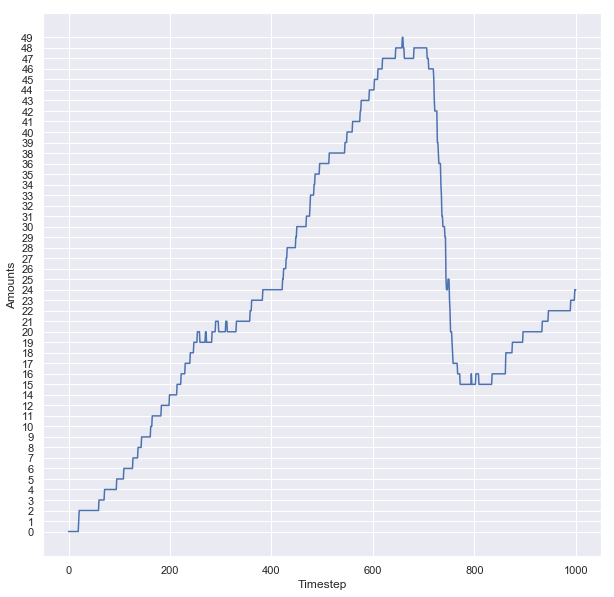

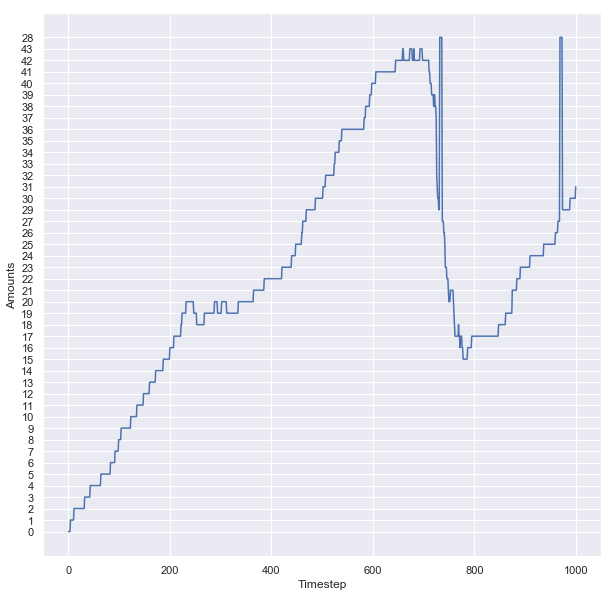

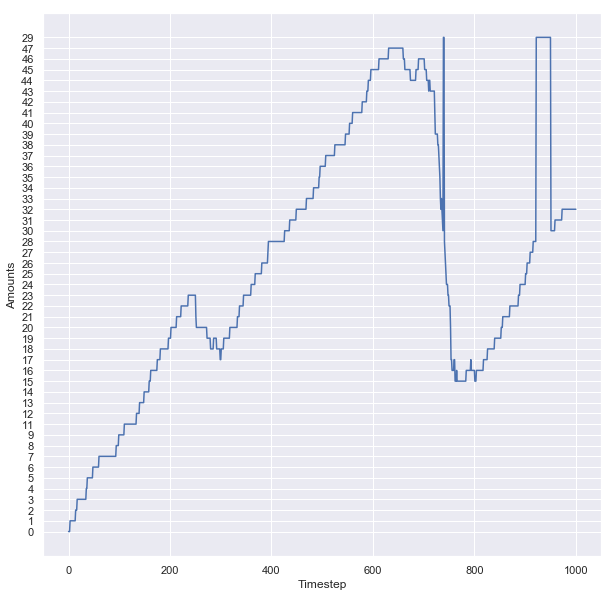

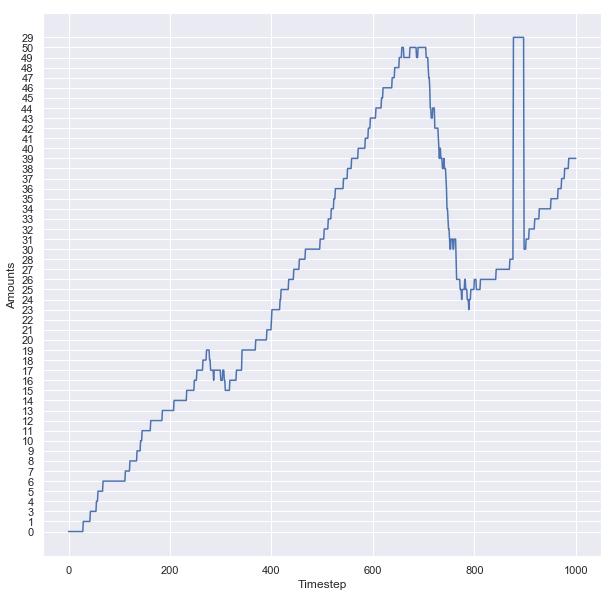

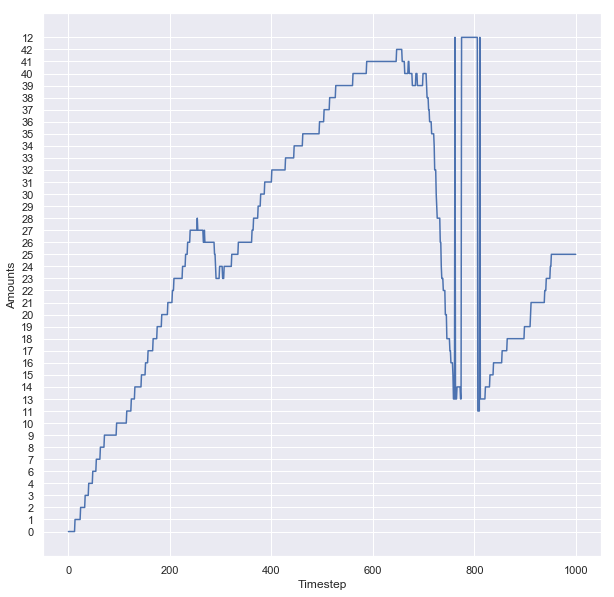

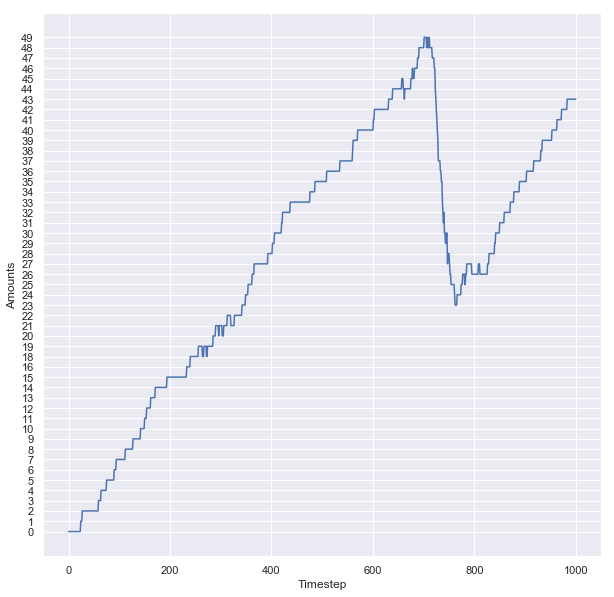

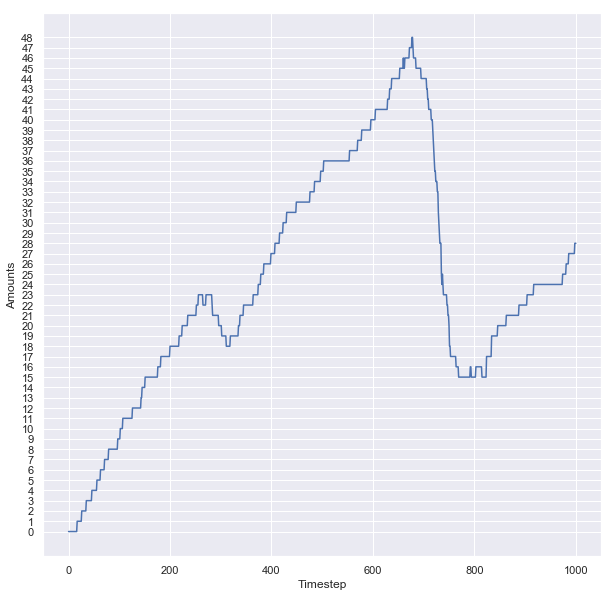

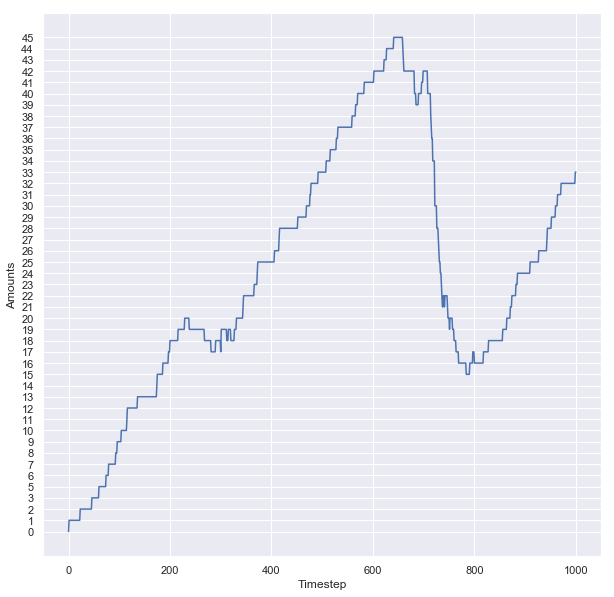

In [9]:
# ratio of unobserved data/total data
def createBatchData(ratio, amount, data):
    period = int(len(data) / amount)
#     print(period)
    intervalSize = int((ratio) * period)
#     print(period, intervalSize)
    dataBatchArray = []
    currentIndex = 0
    
    # Benedict, is that you?
    currentBatch = []

    for sample in data:

        if currentIndex >= intervalSize and currentIndex < period:
#             print(sample)
            currentBatch.append(sample)
            currentIndex = currentIndex + 1
            
            if currentIndex >= period:
                dataBatchArray.append((np.mean(currentBatch), np.std(currentBatch)))
                currentBatch = []
                currentIndex = 0
        else:
            currentIndex = currentIndex + 1
            

    return dataBatchArray

def accCheck(data, sample_size):
    
    means = []
    # calculate means for each batch -> then for each simulation
    for i in data:
        tempMeans = []
        for j in i:
            tempMeans.append(j[0])
        means.append(tempMeans)

    # total mean
    stds = np.std(means)
    means = np.mean(means)

    Za = 1.96
    # Get confidence bounds (mean +- z*S/sqrt(n))
    confidence = [means-Za*(stds/sample_size**.5), means+Za*(stds/sample_size**.5)]

    # Get accuracy (Z*sqrt(mean(1-mean)))/sqrt(n)
    accuracy = (Za*stds) / (sample_size **.5 * means)
    return accuracy, confidence 

In [44]:
batchMeans = createBatchData(0.3, 30, carsTimes)

# we need to do more than 1 simulation right?
accCheck(batchMeans, 750)

IndexError: invalid index to scalar variable.